In [1]:
# Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Pringing The DataFrame To The Workspace

In [2]:
# Reading The Data Using Pandas
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# Adding A Function To Name Every Plot
def txy(title,y,x):
    plt.title(title)
    plt.ylabel(y)
    plt.xlabel(x)
    plt.show()

# Questions : 
## What is the top 20 Genres Making Revenues ?
## Does The Budget Effects The Revenue ?


# Exploring The Data To See If It Needs Cleaning

In [4]:
# Exploring The Data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Exploring The Data's Summary Statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Exploring The Values Of The Data To See If There Any Nan Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

# Cleaning The Data To Analyze It

In [7]:
# Dropping The Columns That Have Too Many Nan Values
dropped_columns = ['cast','homepage','tagline','keywords',
                   'production_companies',]
df.drop(dropped_columns, axis = 1, inplace = True)

# I Dropped These Exact Columns
# Because They Had Too Much Missing Values
# ِAnd I Don't Need Them

In [8]:
# Dropping The Rest Missing Values In The Data
df.dropna(inplace = True)

# EDA (Exploratory Data Analysis)

In [9]:
# Seeing The Data Columns In Short Way To Conclude Questions
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10794 entries, 0 to 10865
Data columns (total 16 columns):
id                10794 non-null int64
imdb_id           10794 non-null object
popularity        10794 non-null float64
budget            10794 non-null int64
revenue           10794 non-null int64
original_title    10794 non-null object
director          10794 non-null object
overview          10794 non-null object
runtime           10794 non-null int64
genres            10794 non-null object
release_date      10794 non-null object
vote_count        10794 non-null int64
vote_average      10794 non-null float64
release_year      10794 non-null int64
budget_adj        10794 non-null float64
revenue_adj       10794 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.4+ MB


In [10]:
# Exploring The Data Columns
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Answering Questions With Visualization To Make Desi

### What Is The Top 20 Genres Making Revenues To Know What Is The Most Genre Making Revenues

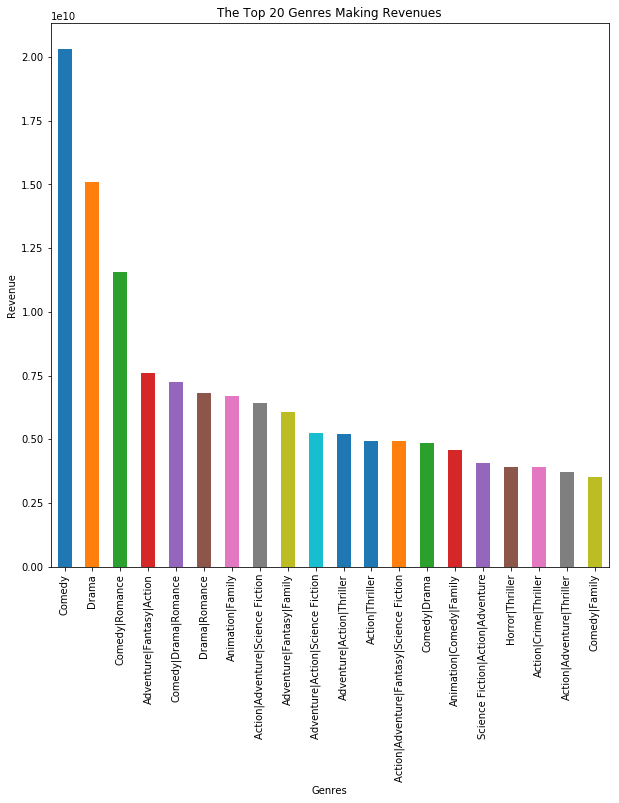

In [14]:
top_20 = df.groupby('genres')['revenue'].sum().sort_values(ascending=False).head(20)
top_20.plot(kind='bar', figsize=(10, 10))
txy('The Top 20 Genres Making Revenues','Revenue','Genres')

### Does The Budget Effects The Revenue

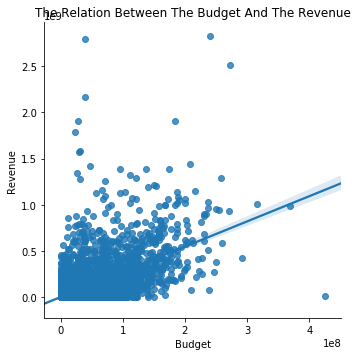

In [12]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='budget_adj', y='revenue_adj', data=df)
txy('The Relation Between The Budget And The Revenue','Revenue','Budget')

## Conclusions
### So We Have Seen That The Most Genre Have Done Revenue Is The Comedy Genre
### And We Saw That The Revenue Increases When The Budget Increases
### ِAnd This Data Would be More Stronger If It Wasn't Have That Much Of Missing Values

In [12]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0